In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the mnist dataset
mnist = fetch_openml('mnist_784', version=1)

In [29]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [52]:
# saparate the features.
x, y = mnist['data'], mnist['target']

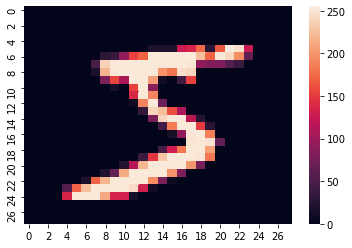

In [53]:
# displaying numbers
sns.heatmap(data = x[0].reshape(28,28))
plt.show()

In [54]:
x_train, x_test, y_train, y_test = x[:5000], x[20000:22000], y[:5000], y[20000:22000]

In [62]:
y_train_5 = (y_train=='5')
y_test_5 = (y_test=='5')

In [59]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=27)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=27)

In [60]:
y_pred = sgd_clf.predict(x_test)

# Evalution

## 1. Cross validation

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [15]:
# stratified cross validation 
skfold = StratifiedKFold(random_state=27)
for train_index, test_index in skfold.split(x_train,y_train):
    clone_clf = clone(sgd_clf)
    x_train_fold = x_train[train_index]
    y_train_fold = y_train[train_index]
    x_test_fold = x_train[test_index]
    y_test_fold = y_train[test_index]
    clone_clf.fit(x_train_fold,y_train_fold)
    y_cross_val_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_cross_val_pred == y_test_fold)
    print(n_correct/len(y_cross_val_pred))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.859
0.863
0.858
0.873
0.85


In [23]:
from sklearn.model_selection import cross_val_score, cross_val_predict
print('cross_val_predict return actual prediction')
print(cross_val_predict(sgd_clf, x_train, y_train, cv=5))
print('cross_val_score return accuracy score')
print(cross_val_score(sgd_clf, x_train, y_train, cv=5, scoring='accuracy'))


cross_val_predict return actual prediction
['5' '0' '4' ... '2' '1' '2']
cross_val_score return accuracy score
[0.859 0.863 0.858 0.873 0.85 ]


## 2. Confusion matrix

In [66]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve
confusion_matrix(y_test_5,y_pred)

array([[1792,   34],
       [  36,  138]], dtype=int64)

## 3. Precision_score

In [67]:
precision_score(y_test_5,y_pred)

0.8023255813953488

## 4. Recall Score

In [68]:
recall_score(y_test_5,y_pred)

0.7931034482758621

## 5. How to set thresold 

In [73]:
# decision function return score for each instance
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=5, method='decision_function')

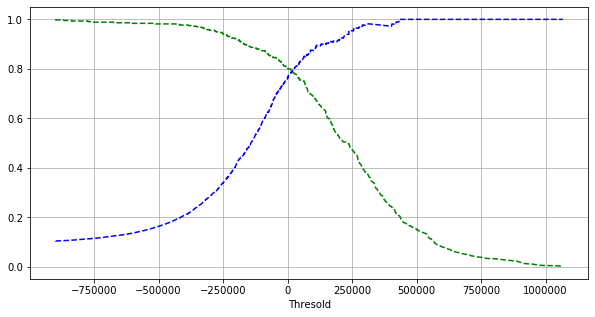

In [120]:
precision, recall, thresold = precision_recall_curve(y_train_5, y_scores)

def plot_(pr, re, th):
    plt.figure(figsize=(10,5))
    plt.plot(th, pr[:-1], 'b--', label='precision')
    plt.plot(th, re[:-1], 'g--', label='recall')
    plt.xlabel('Thresold')
    plt.grid()

plot_(precision, recall, thresold)

## 6. ROC and AUC

In [117]:
from sklearn.metrics import roc_curve, roc_auc_score

ROC-AUC score:  0.9637074065775689


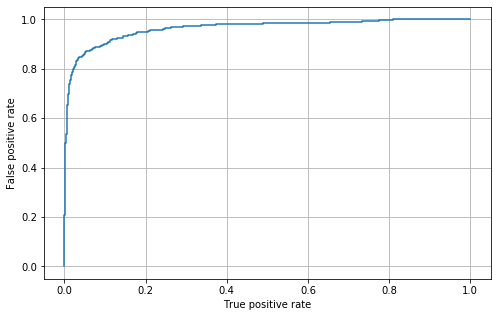

In [118]:
fpr, tpr, th = roc_curve(y_train_5, y_scores)

def roc_curve(fpr, tpr):
    plt.figure(figsize=(8,5))
    plt.plot(fpr, tpr)
    plt.xlabel('True positive rate')
    plt.ylabel('False positive rate')
    plt.grid()
    
roc_curve(fpr, tpr)
print('ROC-AUC score: ', roc_auc_score(y_train_5, y_scores))

## 7. Precision-Recall (PR) Curve

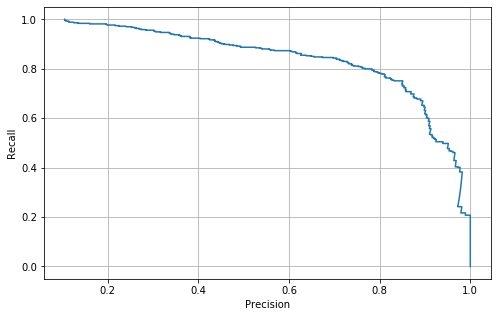

In [115]:
def pr_curve(pr, re):
    plt.figure(figsize=(8,5))
    plt.plot(pr, re)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.grid()
pr_curve(precision, recall)

In [126]:
from sklearn.metrics import auc
auc(np.sort(precision), np.sort(recall))

0.8740912100589271